# Ensemble Training

## Optimized Hyperparameters

| hyperparameter|ESOL|FP|AIT|FLVL|FLVU|HCOM|
|--------------:|---:|-:|--:|---:|---:|---:|
| hidden_size | 91 | 84 | 65 | 63 | 68 | 64 |
| dropout | 0.282 | 0.360 | 0.266 | 0.362 | 0.335 | 0.435 |
| num_layers | 2 | 4 | 4 | 3 | 2 | 4 |
| num_timesteps | 4 | 4 | 4 | 3 | 3 | 4 |
| lr_init | 0.01 | 0.01 | 0.01 | 0.01 | 0.001 | 0.01 |
| gamma | 0.980 | 0.994 | 0.995 | 0.982 | 0.995 | 0.995 |
| weight_decay | 6.0 $\times$ 10$^{-5}$ | 3.5 $\times$ 10$^{-3}$ | 1.8 $\times$ 10$^{-3}$ | 1.3 $\times$ 10$^{-2}$ | 1.2 $\times$ 10$^{-3}$ | 2.7 $\times$ 10$^{-3}$ |

## Hyperparameter Setting

In [1]:
parameters = dict(
    subfrag_size = 12,
    edge_size = 3,
    out_size = 1,
    seed = 42,
    batch_size = 256,
    max_epoch = 200,
    verbose = False,
    save = False,
    
    target = 'ESOL',
    hidden_size = 91,
    dropout = 0.282,
    num_layers = 2,
    num_timesteps = 4,
    lr_init = 0.01,
    gamma = 0.980,
    weight_decay = 6.0E-5,
)
DATAPATH = "/SSD2/bgkang/Chemomile"

## Dataset

In [2]:
import sys
sys.path.append(DATAPATH)
from src.data import Dataset

dataset = Dataset(
    target = parameters['target'],
    seed = parameters['seed'],
    batch_size = parameters['batch_size'],
    verbose = parameters['verbose'],
    root = DATAPATH
)

## Ensemble Define

In [3]:
import os
from src.ensemble import EnsembleTraining

ensemble = EnsembleTraining(
    numEnsemble = 8,
    parameters = parameters,
    dataset = dataset,
    root = "../Model")

In [4]:
ensemble.run()

/SSD2/bgkang/.miniconda3/envs/Torch/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:136: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Seems like `optimizer.step()` has been overridden after learning rate scheduler "
/SSD2/bgkang/.miniconda3/envs/Torch/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:136: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Seems like `optimizer.step()` has been overridden after learning rate scheduler "
/SSD2/bgkang/.miniconda3/envs/Torch/lib/python3.11/site-

## Test

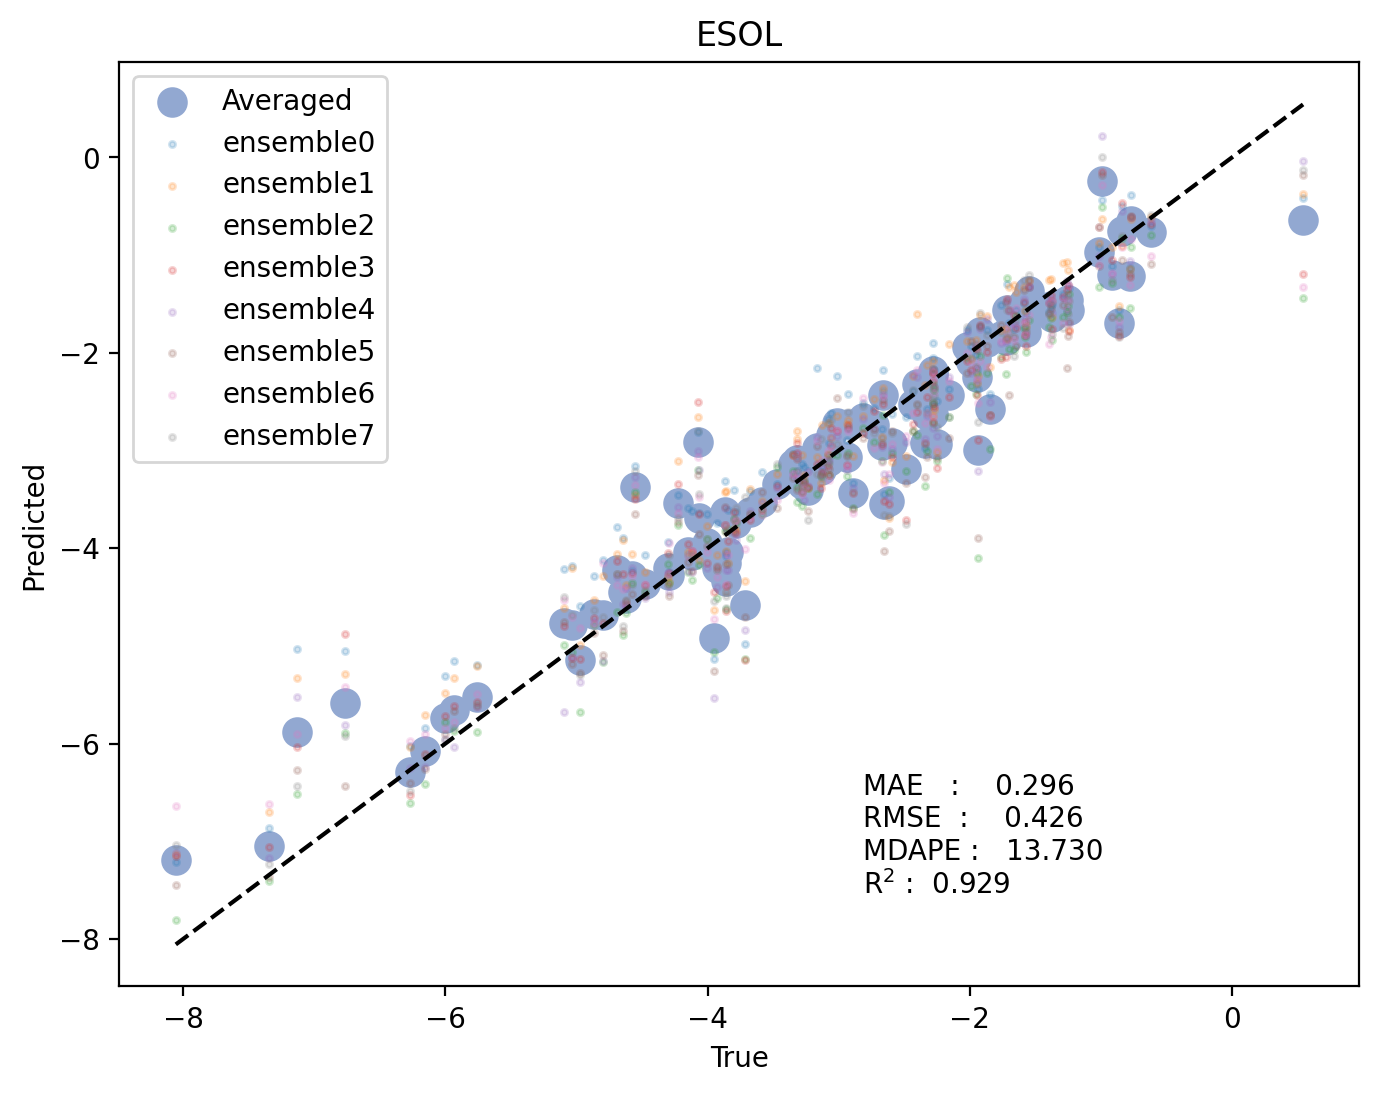

In [5]:
ensemble.TPPlot()